## Download Libraries if not already installed

In [1]:
# ! pip install pandas
# ! pip install numpy
# ! pip install plotly
# ! pip install tabulate
# ! pip install spacy
# ! python -m spacy download en_core_web_sm
# ! pip install scikit-learn
# ! pip install wordcloud

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import string
from tabulate import tabulate
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.plotting.backend = "plotly"

## EDA (Exploratory Data Analysis)

In [3]:
doc_floc = "data/title_conference.csv"
doc_df = pd.read_csv(doc_floc, on_bad_lines='skip', encoding = 'unicode_escape')

row, col = doc_df.shape
print("No of rows:{} \nNo of columns:{}".format(row, col))
doc_df.head(5)

No of rows:2507 
No of columns:2


,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


In [4]:
def check_dup_null(df):
    ## Check for duplicates and null values
    print("Number of Duplicates:", df.duplicated().sum())
    
    counts = df.isna().sum()
    print("Number of null values in each columns:\n{}".format(counts.to_markdown(tablefmt="fancy_grid", headers=["Column_name", "#Null Values"])))

In [5]:
check_dup_null(doc_df)

Number of Duplicates: 0
Number of null values in each columns:
╒═══════════════╤════════════════╕
│ Column_name   │   #Null Values │
╞═══════════════╪════════════════╡
│ Title         │              0 │
├───────────────┼────────────────┤
│ Conference    │              0 │
╘═══════════════╧════════════════╛


In [6]:
## Remove Null values and duplicates
doc_df.dropna(inplace=True)             ## Same as: doc_df = doc_df.dropna()
doc_df.drop_duplicates(inplace=True)    ## Same as: doc_df = doc_df.drop_duplicates()

## Recheck after Removal
check_dup_null(doc_df)

Number of Duplicates: 0
Number of null values in each columns:
╒═══════════════╤════════════════╕
│ Column_name   │   #Null Values │
╞═══════════════╪════════════════╡
│ Title         │              0 │
├───────────────┼────────────────┤
│ Conference    │              0 │
╘═══════════════╧════════════════╛


In [7]:
## Check for Class Distribution
classes = doc_df["Conference"].unique()
print("Unique classes: ", classes)

## Unique classes and their counts
print(doc_df["Conference"].value_counts().to_markdown(tablefmt="fancy_grid", headers=["Conference", "# of values"]))

Unique classes:  ['VLDB' 'ISCAS' 'SIGGRAPH' 'INFOCOM' 'WWW']
╒══════════════╤═══════════════╕
│ Conference   │   # of values │
╞══════════════╪═══════════════╡
│ ISCAS        │           864 │
├──────────────┼───────────────┤
│ INFOCOM      │           515 │
├──────────────┼───────────────┤
│ VLDB         │           423 │
├──────────────┼───────────────┤
│ WWW          │           379 │
├──────────────┼───────────────┤
│ SIGGRAPH     │           326 │
╘══════════════╧═══════════════╛


In [8]:
## word and character distribution in feature column

## Step 1: Remove punctuations from the data
doc_df["processed_title"] = doc_df["Title"].apply(lambda x: re.sub("[^\w]+", " ", x.lower()))

## Step 2: count number of words per row
word_counts = doc_df["processed_title"].apply(lambda x: len(list(filter(None, x.split(" ")))))
char_counts = doc_df["processed_title"].apply(lambda x: len(re.sub("\s+", "", x)))
## Step 3: Calculate the metrics

print(tabulate([["metrics", "word_level", "char_level"],
                ["max title length", np.max(word_counts), np.max(char_counts)], 
                ["min title length", np.min(word_counts), np.min(char_counts)],
                ["average title length", round(np.mean(word_counts)), round(np.mean(char_counts))]], 
                headers="firstrow",
                tablefmt="fancy_grid"))

╒══════════════════════╤══════════════╤══════════════╕
│ metrics              │   word_level │   char_level │
╞══════════════════════╪══════════════╪══════════════╡
│ max title length     │           28 │          185 │
├──────────────────────┼──────────────┼──────────────┤
│ min title length     │            1 │            5 │
├──────────────────────┼──────────────┼──────────────┤
│ average title length │            9 │           57 │
╘══════════════════════╧══════════════╧══════════════╛


In [9]:
## Create a word cloud for every class

nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])
nlp.Defaults.stop_words.add("based")
#Step 1: Remove punctuation, numbers, stop words and lemmatize the text

doc_df["lemmatized_text"] = doc_df["Title"].apply(lambda x: " ".join(word.text for word in nlp(x.lower()) 
                                                                     if not word.is_stop 
                                                                     and not word.is_punct
                                                                     and not re.match('.*\d+.*', word.text)).strip())

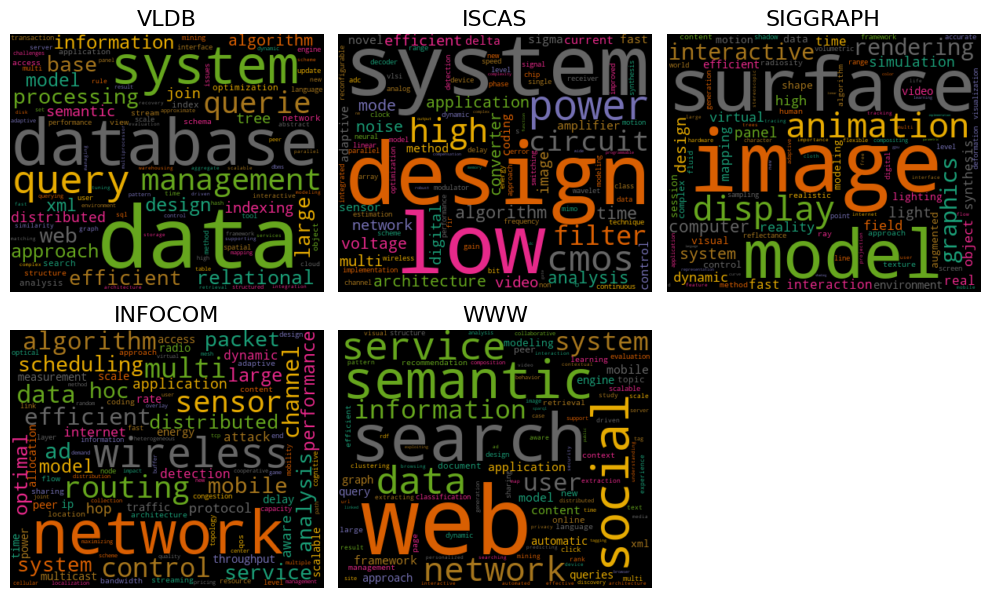

In [10]:
#Step 2: Create a wordcloud per class

ncol = 3
nrow = len(classes)//ncol

fig = plt.figure(figsize=(2*len(classes), 3*len(classes)))
for i, category in enumerate(classes):
    ax = fig.add_subplot(len(classes),ncol,i+1)
    text = " ".join(doc_df[doc_df["Conference"]==category]["lemmatized_text"])
    word_cloud = WordCloud(width=400, height=330, max_words=100, colormap="Dark2", collocations=False, random_state=33).generate(text)
    ax.imshow(word_cloud, interpolation='bilinear')
    ax.set_title(category,fontsize=16)
    ax.axis("off")
fig.tight_layout()

 ## Pandas-Profiling
 A powerful tool for in-depth analysis of your data set

In [11]:
# ! pip install -U pandas-profiling[notebook]

In [12]:
from pandas_profiling import ProfileReport
import os

profile = ProfileReport(doc_df, title="Pandas Profiling Report", missing_diagrams={'bar':False})
if not os.path.isdir("report"):
    os.mkdir("report")

profile.to_file("report/doc_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]